# Lecture 18 - Differential Equations

The goal of this lecture is to accomplish two things:

* Explain how to use linear algebra and discrete approximation to give approximate solutions to differential equations- The goal is to give a feeling for how discrete approximation works.
* Explain how to use SageMath to solve differential equations. These solutions are better because they give error bounds.

In [ ]:
# Imports Numpy
import numpy as np

## Spring problem

We will study a classic example, which hopefully you have seen before in a differential equations class.

In the spring problem, we let a spring hang from the ceiling. Then we attach an object to the bottom of the spring. We pull down or lift the object and give it some initial velocity and let go. We want to know the position $u$ of the object at time $t$.

We use the variable $u$ to denote the vertical displacement of the object measured relative to position of the object at equilibrium. Thus $u(t)= 0$ for all $t$ is one solution (if there is no force other than gravity acting). We also parameterize so that larger values if $u$ indicate that the object is lower (equivalently, the spring is longer), and smaller values indicate that the object is higher (and the spring is shorter).

The differential equation satisfied by the spring is of the form 
$$m u'' + \gamma u' + k u = F(t),$$
where $m$ is the mass of the object, $\gamma$ is the damping coefficient, $k$ is the spring constant, and $F(t)$ is the total of any external forces other than gravity acting on the spring. In order to have a unique solution, we also specify:
* The initial displacement $u(0)=u_0$.
* The initial velocity of the mass $u'(0)=v_0$.

**Reference:** The derivation of the differential equation is common in differential equations books. For example, see [section 17.3](https://math.libretexts.org/Bookshelves/Calculus/Calculus_(OpenStax)/17%3A_Second-Order_Differential_Equations/17.03%3A_Applications_of_Second-Order_Differential_Equations) of the following freely available book:

*  [Gilbert Strang & Edwin Herman, Calculus](https://math.libretexts.org/Bookshelves/Calculus/Calculus_(OpenStax)).

## Discretization

#### Set up

<p style="margin-top:2em; text-indent: 2em;">
Let's say that we want to approximate the solution on the interval $[0,T]$. By discretization, we mean we want to approximate the solution using finitely many points. Suppose we want to know the value of $u(t)$ for
$$t \in \left\{0, \frac{T}{N}, \frac{2T}{N}, \ldots, \frac{(N-1)T}{N}, T\right\}.$$
Let $t_j = \frac{jT}{N}$ for $j \in \{0, \ldots, N\}$ and $h=\frac{T}{N}$. Then 
$$t_{j+1}=t_j + h.$$
We can organize the $t_j$ values in a vector
    $${\mathbf t} = \big(t_0, t_1, \ldots, t_{N}\big).$$
</p>

<p style="margin-top:2em; text-indent: 2em;">
We are looking for the values $u_j = u(t_j)$. We will eventually store them as a vector:
    $${\mathbf u} = (u_0, u_1, \ldots, u_N).$$
</p>

#### Initial Values
<p style="margin-top:2em; text-indent: 2em;">We get equations from the initial values for the differential equation. Since $u_0 = u(0)$, we can write the initial displacement equation as:
    $$\label{eq:eq1} u_0 = a. \tag{1}$$
We also know $u'(0)=b$. Using the discrete approximation of the derivative, we have 
    $$u'(0) \approx \frac{u(h)-u(0)}{h} = \frac{u_1 - u_0}{h}.$$
So, we will approximate the condition $u'(0)=b$ by 
    $$\frac{-1}{h} u_0 + \frac{1}{h} u_1 = b. \tag{2}$$
</p>

<p style="margin-top:2em; text-indent: 2em;">
    We can combine the two equations above in a matrix-vector equation:
    $$\left[\begin{array}{rrrrr}
    1 & 0 & 0 & 0 & \ldots \\
    \frac{-1}{h} & \frac{1}{h} & 0 & 0 & \ldots \\
    \end{array}\right]\left[\begin{array}{r} u_0 \\ u_1 \\ \vdots \\ u_N\end{array}\right] = 
    \left[\begin{array}{r} a \\ b \end{array}\right].$$

#### The differential equation
<p style="margin-top:2em; text-indent: 2em;">
    We currently have two linear equations from initial values (labeled (1) and (2) above) and $N+1$ unknowns. We need to look for $N-1$ more equations so that we have the same number of equations and unknowns.</p>
<p style="margin-top:2em; text-indent: 2em;">
    We will find one equation for each time $t_j$ with $j \in \{1, \ldots, N-1\}$. Assuming $u_0=u(t_0), \ldots, u_j=u(t_j)$ are area already determined, we will be able to determin $u_{j+1} = u(t_{j+1}).$
</p>

<p style="margin-top:2em; text-indent: 2em;">
    Our differential equation considered at time $t_j$ is given by 
    $$m u''(t_j) + \gamma u'(t_j) + k u(t_j) = F(t_j).$$
    We have $u_j=u(t_j)$. We want to replace $u'(t_j)$ and $u''(t_j)$ with linear combinations of the entries $u_\ast$.
</p>

<p style="margin-top:2em; text-indent: 2em;">
    We can estimate $u'(t_j)$ using the two point estimate
    $$u'(t_j) \approx \frac{u(t_j+h)-u(t_j - h)}{2h} = \frac{u_{j+1} - u_{j-1}}{2h}.$$

<p style="margin-top:2em; text-indent: 2em;">
    Similarly, we can estimate $u''(t_j)$ by 
    $$u''(t_j)=\frac{u(t_j+h) - 2 u(t_j) + u(t_j-h)}{h^2}=\frac{u_{j+1} - 2 u_j + u_{j-1}}{h^2}.$$
</p>

<p style="margin-top:2em; text-indent: 2em;">
Substituting these approximations into our differential equation $m u''(t_j) + \gamma u'(t_j) + k u(t_j) = F(t_j)$ gives us the linear equation:
    $$\frac{mu_{j+1} - 2 mu_j + mu_{j-1}}{h^2} + \frac{\gamma u_{j+1} - \gamma u_{j-1}}{2h} + k u_j = F(t_j).$$
It makes sense to combine like terms. This yields the equation:
    $$\left(\frac{m}{h^2}-\frac{\gamma}{2h}\right)u_{j-1} +
    \left(k-\frac{2m}{h^2}\right)u_j +
    \left(\frac{m}{h^2}+\frac{\gamma}{2h}\right)u_{j+1} = F(t_j).$$
    Here we are getting one equation for each $j=1, \ldots, N-1$ as noted above. Combining these as a matrix equation, we have:
    $$\begin{bmatrix}
\frac{m}{h^2}-\frac{\gamma}{2h} & k-\frac{2m}{h^2} & \frac{m}{h^2}+\frac{\gamma}{2h} & 0 & \ldots & \dots & 0 \\
0 & \frac{m}{h^2}-\frac{\gamma}{2h} & k-\frac{2m}{h^2} & \frac{m}{h^2}+\frac{\gamma}{2h} & 0 & \ldots & 0 \\
\vdots & \ddots & \ddots & \ddots & \ddots & \ddots & \vdots \\ 
\vdots &  & \ddots & \ddots & \ddots & \ddots & 0 \\ 
0 & \dots & \dots & 0 & \frac{m}{h^2}-\frac{\gamma}{2h} & k-\frac{2m}{h^2} & \frac{m}{h^2}+\frac{\gamma}{2h}
\end{bmatrix}.
\begin{bmatrix}
u_0 \\
u_1 \\
u_2 \\
u_3 \\
\vdots \\
u_N \\
\end{bmatrix}
=
\begin{bmatrix}
F(t_1) \\
F(t_2) \\
F(t_3) \\
\vdots \\
F(t_{N-1})
\end{bmatrix}
$$

#### The linear system

Combining the matrix equations from the initial conditions and the differential equation, we get the following:

$$\begin{bmatrix}
1 & 0 & \ldots & \ldots & \ldots & \dots & 0 \\
\frac{-1}{h} & \frac{1}{h} & 0 & \ldots & \ldots & \ldots & 0 \\
\frac{m}{h^2}-\frac{\gamma}{2h} & k-\frac{2m}{h^2} & \frac{m}{h^2}+\frac{\gamma}{2h} & 0 & \ldots & \dots & 0 \\
0 & \frac{m}{h^2}-\frac{\gamma}{2h} & k-\frac{2m}{h^2} & \frac{m}{h^2}+\frac{\gamma}{2h} & 0 & \ldots & 0 \\
\vdots & \ddots & \ddots & \ddots & \ddots & \ddots & \vdots \\ 
\vdots &  & \ddots & \ddots & \ddots & \ddots & 0 \\ 
0 & \dots & \dots & 0 & \frac{m}{h^2}-\frac{\gamma}{2h} & k-\frac{2m}{h^2} & \frac{m}{h^2}+\frac{\gamma}{2h}
\end{bmatrix}.
\begin{bmatrix}
u_0 \\
u_1 \\
u_2 \\
u_3 \\
u_4 \\
\vdots \\
\vdots \\
u_N \\
\end{bmatrix}
=
\begin{bmatrix}
a\\
b\\
F(t_1) \\
F(t_2) \\
F(t_3) \\
\vdots \\
\vdots \\
F(t_{N-1})
\end{bmatrix}.
$$
Here $a=u(t_0)$ and $b=u'(t_0)$

#### Solving the system

We can solve the system by forward substitution. Associated to the first line we have
$$u_0 = a.$$

The second line is 
$\frac{-1}{h} u_0 + \frac{1}{h} u_1 = b.$
Solving, we see that
$$u_1 = h\big(b + \frac{u_0}{h}).$$

Then the generic line in the matrix is given by 
$$\left(\frac{m}{h^2}-\frac{\gamma}{2h}\right)u_{j-1} +
    \left(k-\frac{2m}{h^2}\right)u_j +
    \left(\frac{m}{h^2}+\frac{\gamma}{2h}\right)u_{j+1} = F(t_j).$$

We'll assume we already know $u_{j-1}$ and $u_j$. Then we have
$$u_{j+1} = \left(F(t_j) - \left(\frac{m}{h^2}-\frac{\gamma}{2h}\right)u_{j-1} -
    \left(k-\frac{2m}{h^2}\right)u_j\right)\Big/\left(\frac{m}{h^2}+\frac{\gamma}{2h}\right).$$

## Implementation

We need to pass our function a number of parameters:
* The mass `m`, the damping constant `gamma`, and the spring constant `k`.
* The forcing function `F`, which will be a Python function ${\mathbb R} \to {\mathbb R}$.
* The initial position `a` and velocity `b`.
* The time $T$ determining the interval $[0,T]$.
* The number $N$, so that we use $N+1$ points equally spaced in $[0,T]$.

Our function will return a numpy array `u` with entries `u[0]` up to `u[N]`. The value of `u[j]` will store the computed value of $u_j = u(t_j)$.

The following function implements this:

In [ ]:
def spring_solve(m, gamma, k, F, a, b, T, N):
    r'''
    Return a Numpy array approximating the solution to the differential equation
    $$m u''(t_j) + \gamma u'(t_j) + k u(t_j) = F(t_j).$$
    Here `m`, `gamma`, and `k` are constants, while `F(t)` is a sage function of one
    variable. The initial values are `u(0)=0` and `u'(0)=b`. We find an approximate
    solution over the interval `[0, T]` using `N+1` equally spaced points, returning
    the Numpy array of values `u` takes.
    '''
    h = T/N
    # The t values we use:
    t = np.linspace(0, T, N+1)
    # This will store the u values we compute.
    u = np.zeros(N+1)
    u[0] = a
    u[1] = h * (b + u[0]/h)
    for j in range(1,N):
        u[j+1] = ( F(t[j]) - (m/h^2-gamma/(2*h))*u[j-1] - (k-2*m/h^2)*u[j] ) / \
            (m/h^2+gamma/(2*h))
    return u

## Examples

### Example 1
First we consider the differential equation
$$u'' + u = 0, \quad u(0)=0, \quad \text{and} \quad u'(0)=1.$$
Clearly the solution is $u(t)=\sin(t)$.

We will observe that our algorithm works surprisingly well over the interval $[0,10]$ with $N=20$.

In [ ]:
T = 10
N = 20
plt = plot(sin(x), (x, 0, T), legend_label="actual solution", figsize=5)
plt

In [ ]:
t = np.linspace(0, T, N+1)
u = spring_solve(1, 0, 1, lambda t:0, 0, 1, T, N)
plt += line2d(zip(t, u), color='red', legend_label="computed approximation")
plt

Here we graph the error:

In [ ]:
t = np.linspace(0, T, N+1)
u = spring_solve(1, 0, 1, lambda t:0, 0, 1, T, N)
line2d(zip(t, u-sin(t)), color='green', legend_label="error", figsize=5)

For larger values of $N$, it works even better:

In [ ]:
T = 10
N = 100
plt = plot(sin(x), (x, 0, T), legend_label="actual solution", figsize=5)
t = np.linspace(0, T, N+1)
u = spring_solve(1, 0, 1, lambda t:0, 0, 1, T, N)
plt += line2d(zip(t, u), color='red', legend_label="computed approximation")
show(plt)

In [ ]:
t = np.linspace(0, T, N+1)
u = spring_solve(1, 0, 1, lambda t:0, 0, 1, T, N)
line2d(zip(t, u-sin(t)), color='green', legend_label="error", figsize=5)

### Example 2

Here is a plot with some damping:

In [ ]:
T = 100
N = 1000
t = np.linspace(0, T, N+1)
u = spring_solve(1, 0.1, 1, lambda t:0, 0, 1, T, N)
line2d(zip(t, u), color='red', legend_label="computed approximation", figsize=5)

### Example 3

Here are some plots with some periodic forcing:

In [ ]:
T = 100
N = 1000
F(t) = cos(t/8)
t = np.linspace(0, T, N+1)
u = spring_solve(1, 0, 1, F, 0, 1, T, N)
line2d(zip(t, u), color='red', figsize=5)

In [ ]:
T = 100
N = 1000
F(t) = cos(t)
t = np.linspace(0, T, N+1)
u = spring_solve(1, 0, 1, lambda t:np.cos(t), 0, 1, T, N)
line2d(zip(t, u), color='red', figsize=5)

### Example 4

Some plots with both periodic forcing and some damping:

In [ ]:
T = 200
N = 1000
F(t) = cos(t/8)
t = np.linspace(0, T, N+1)
u = spring_solve(1, 0.05, 1, F, 0, 1, T, N)
line2d(zip(t, u), color='red', figsize=5)

In [ ]:
T = 150
N = 1000
F(t) = cos(t)
t = np.linspace(0, T, N+1)
u = spring_solve(1, 0.05, 1, F, 0, 1, T, N)
line2d(zip(t, u), color='red', figsize=5)

## Using Sage to solve a differential equation

Sage can numerically solve differential equations of the following form:

\begin{align*}
y_0'(t) &= f_0(t, y_0, \ldots, y_{n-1}) \\
y_1'(t) &= f_1(t, y_0, \ldots, y_{n-1}) \\
&\vdots \\
y_{n-1}'(t) &= f_1(t, y_0, \ldots, y_{n-1}) \\
\end{align*}
for functions $y_0(t), y_1(t), \ldots, y_{n-1}(t)$ over an interval once given initial conditions $y_0(0), \ldots, y_{n-1}(0)$.

### One dimensional example

The book *Computational Mathematics with SageMath* works out the example of the one dimensional Van der Pol oscillator of parameter $\mu$ in section 14.2.1. This is the following equation
$$x''(t) - \mu (1 - x^2) x'(t) + x(t) = 0.$$
Here $x(t)$ represents the position of an object that is oscillating with time $t$. The constant $\mu$ is a damping constant.

To get this into the form above, we write
$y_0(t) = x(t)$ and $y_1(t) = x'(t)$. Then 
\begin{align*}
y_0'(t) &= y_1(t),\\
y_1'(t) &= x''(t) = \mu (1-x^2) x'(t) - x(t) = \mu (1-y_0^2) y_1 - y_0.
\end{align*}
So we have $f_0(t) = y_1(t)$ and $f_1(t) = \mu (1-y_0^2) y_1 - y_0$.

In [20]:
T = ode_solver()

In [21]:
def f(t, y, params):
    # Function f = (f_0, f_1) in terms of t, y and parameters.
    # We only have one parameter mu = params[0]
    return [ 
        y[1],
        params[0] * (1-y[0]^2)*y[1] - y[0]
    ]
T.function = f

In [24]:
T.algorithm = "rk8pd"
T.ode_solve(y_0=[1,0], t_span=[0,100], params=[10,],
            num_points=1000)

In [25]:
# This gives the solution:
T.solution

[(0, [1, 0]),
 (0.1, [0.9949991721288927, -0.10008299932807921]),
 (0.2, [0.9799066603519733, -0.20267438514785563]),
 (0.30000000000000004, [0.9541091910322372, -0.31619668302908155]),
 (0.4, [0.9157402768376061, -0.45807235898635057]),
 (0.5, [0.8604101685065295, -0.6638340756178684]),
 (0.6, [0.7782366811255851, -1.015706272338803]),
 (0.7, [0.645283049250497, -1.7415101809404838]),
 (0.7999999999999999, [0.3935417139691331, -3.619929531447423]),
 (0.8999999999999999, [-0.20605504383917295, -9.397703392172094]),
 (0.9999999999999999, [-1.45686208173767, -11.547387338700608]),
 (1.0999999999999999, [-1.9774113669907953, -1.1059149002768627]),
 (1.2, [-2.008173343534122, 0.008214303733106509]),
 (1.3, [-2.003368097845293, 0.06356344977251681]),
 (1.4000000000000001, [-1.9968024693580695, 0.06658272876181712]),
 (1.5000000000000002, [-1.9901161854397695, 0.0670867527238675]),
 (1.6000000000000003, [-1.9833881049990163, 0.06747311866053674]),
 (1.7000000000000004, [-1.9766214913484963, 

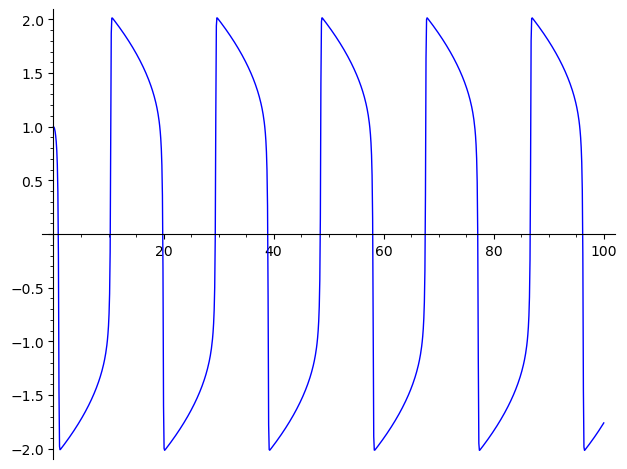

In [27]:
t_x_pairs = [(t,y0) for t,(y0,y1) in T.solution]
line2d(t_x_pairs)

You can also get a function which interpolates values between the computed points.

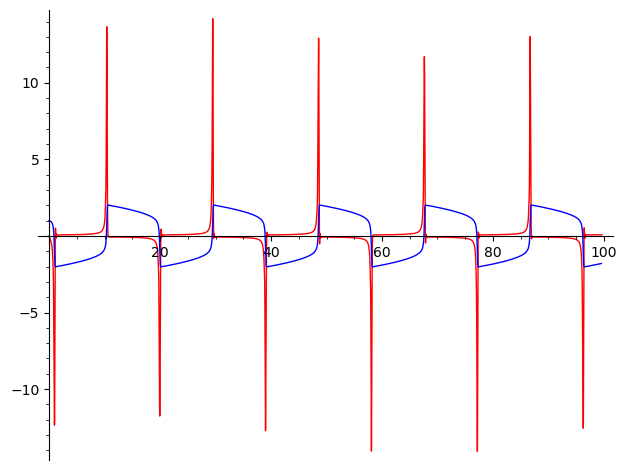

In [29]:
y0_sol = T.interpolate_solution(0) # Get solution y_0
y1_sol = T.interpolate_solution(1) # Get solution y_1
plot(y0_sol, 0, 100) + plot(y1_sol, 0, 100, color='red', zorder=-1)

In [31]:
y0_sol(0.1)

0.9949991721288927

In [32]:
y0_sol(pi)

-1.8743310108708133

**Remark:** You can also plot with and `T.plot_solution(0)` `T.plot_solution(1)`.

Here is a plots of the path $t \mapsto \big(y_0(t), y_1(t)\big).$ These are solutions to a version of the [two-dimensional van der Pol oscillator](https://en.m.wikipedia.org/wiki/Van_der_Pol_oscillator#Two-dimensional_form).

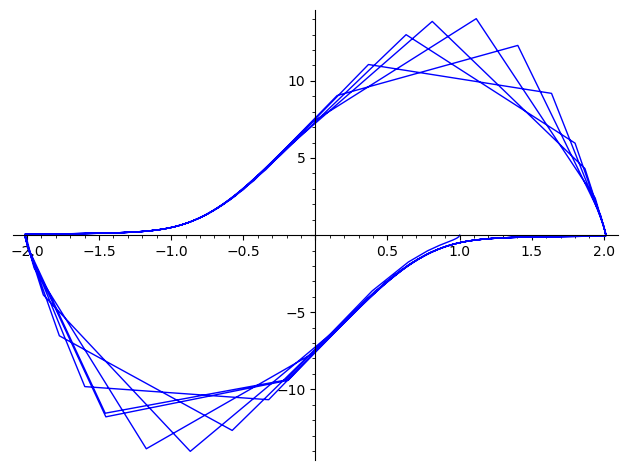

In [33]:
path = [(y0, y1) for t,(y0,y1) in T.solution]
line2d(path)

The solution looks polygonal. Below we adjust the initial conditions and parameter $\mu$ and increase the number of points used to get a smooth plot.

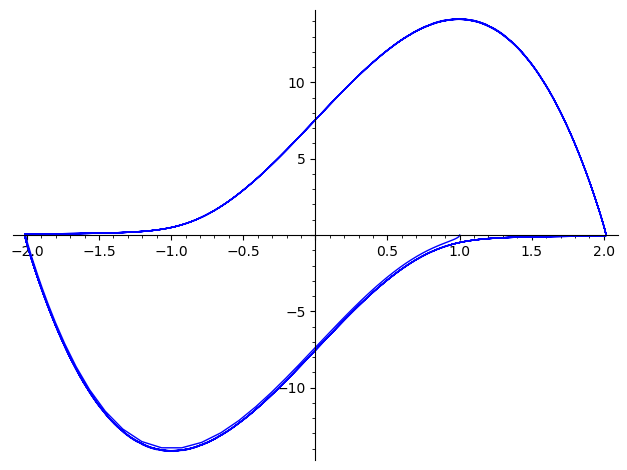

In [36]:
T.ode_solve(y_0=[1,0], t_span=[0,100], params=[10,],
            num_points=10000)
path = [(y0, y1) for t,(y0,y1) in T.solution]
line2d(path)

In [37]:
T.ode_solve(y_0=[1/100,0], t_span=[0,100], params=[0.7],
            num_points=10000)

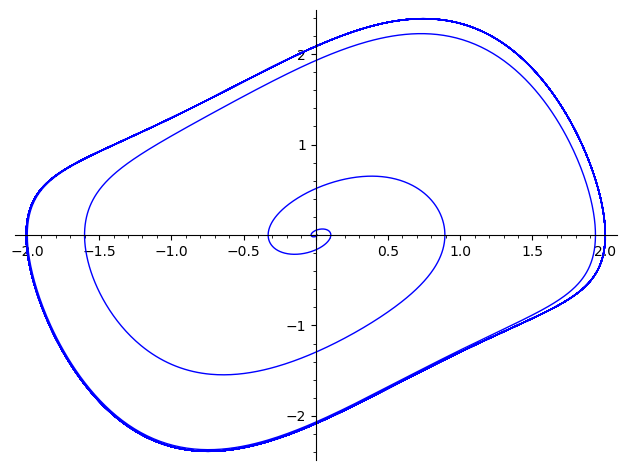

In [38]:
path = [(y0, y1) for t,(y0,y1) in T.solution]
line2d(path)

**Remarks:** The error tolerances can be adjusted. There are a number of different algorithms that can be used. The book *Computational Mathematics with SageMath* has some more examples. Also see the [SageMath reference on `ode_solver`](https://doc.sagemath.org/html/en/reference/calculus/sage/calculus/ode.html)